## Artificial Neural Network:

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# check if there is any null value
df.isnull().sum().sum()

0

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# splitting dataset into two categorical
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != "O"]
print("No of Numerical features: ",len(numerical_feature))
print("Numerical feature are: ",numerical_feature)

categorical_feature = [feature for feature in df if feature not in numerical_feature]
print("No of Categorical features: ",len(categorical_feature))
print(f"Categorical feature are: {categorical_feature}")

No of Numerical features:  11
Numerical feature are:  ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
No of Categorical features:  3
Categorical feature are: ['Surname', 'Geography', 'Gender']


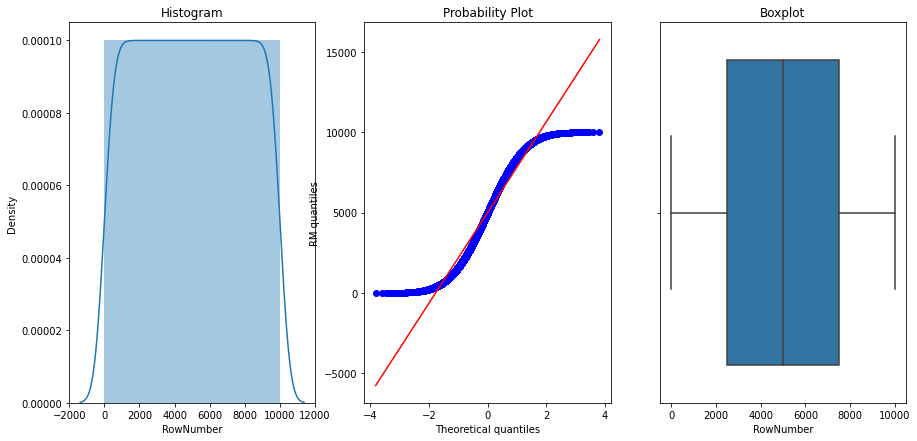

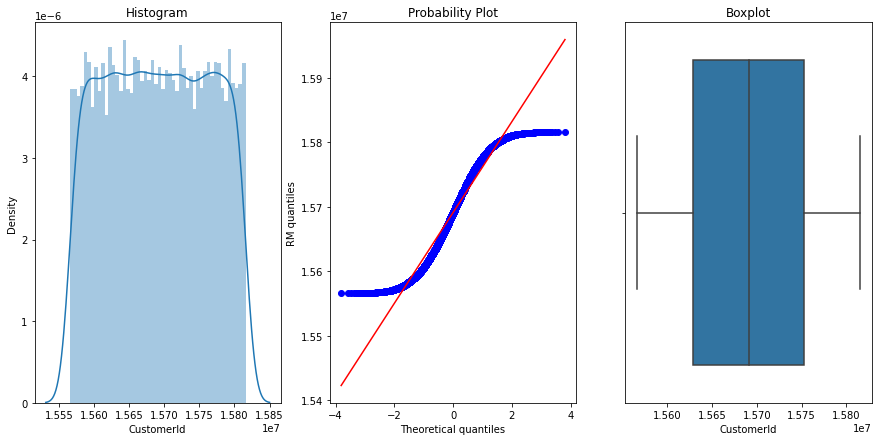

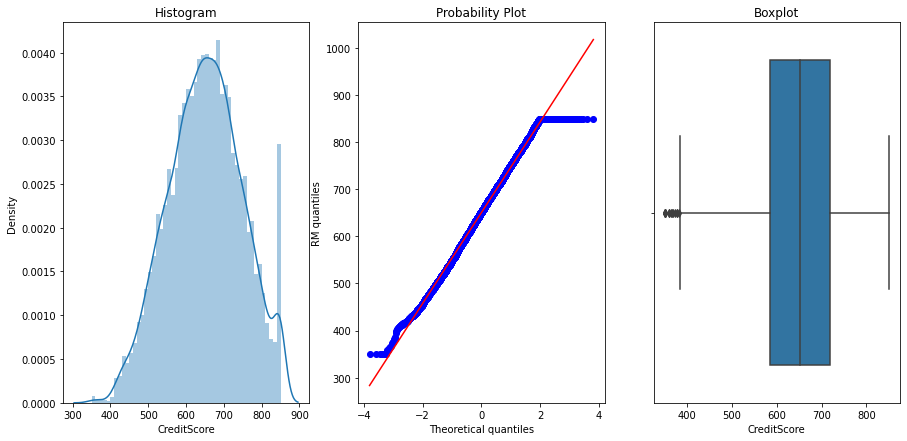

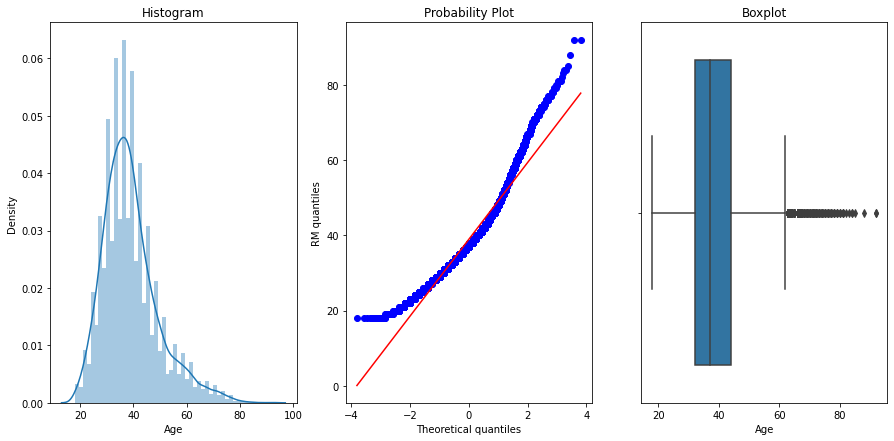

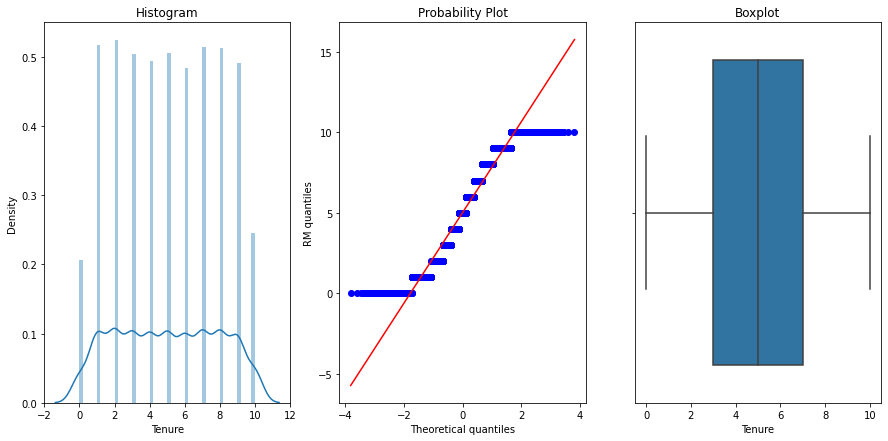

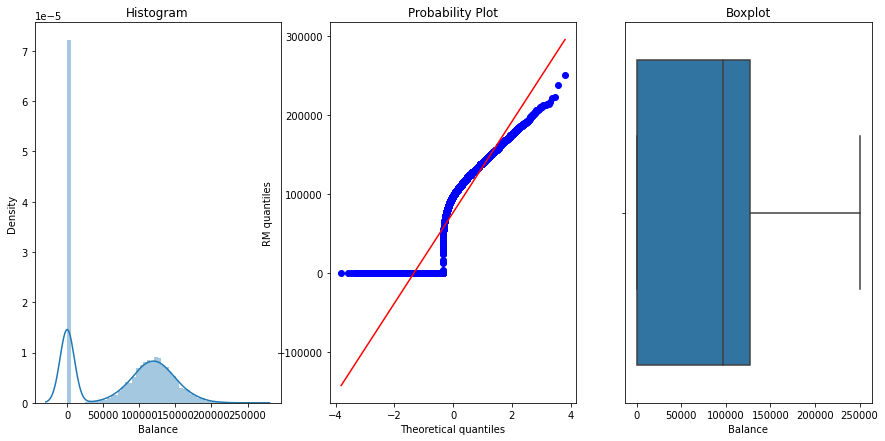

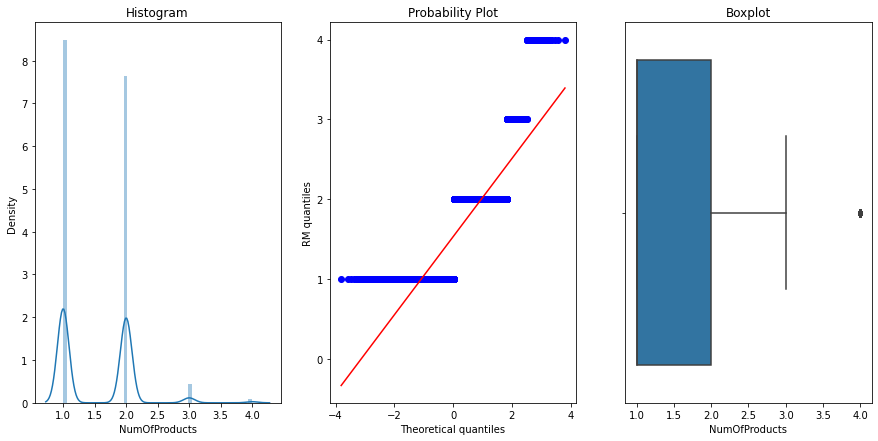

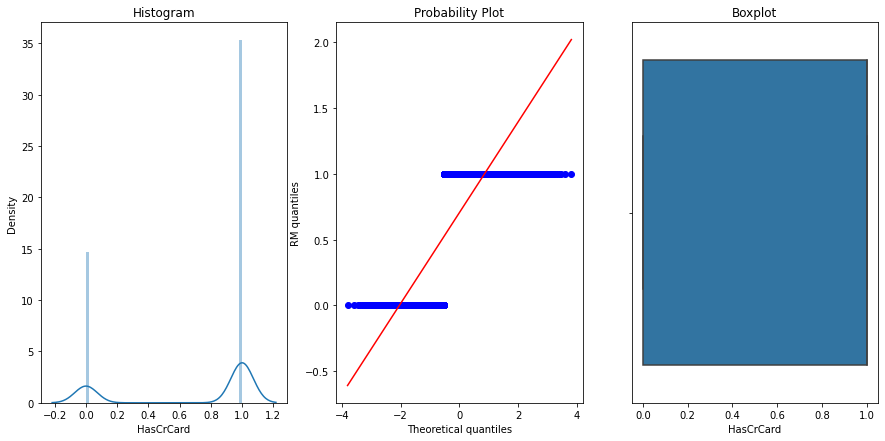

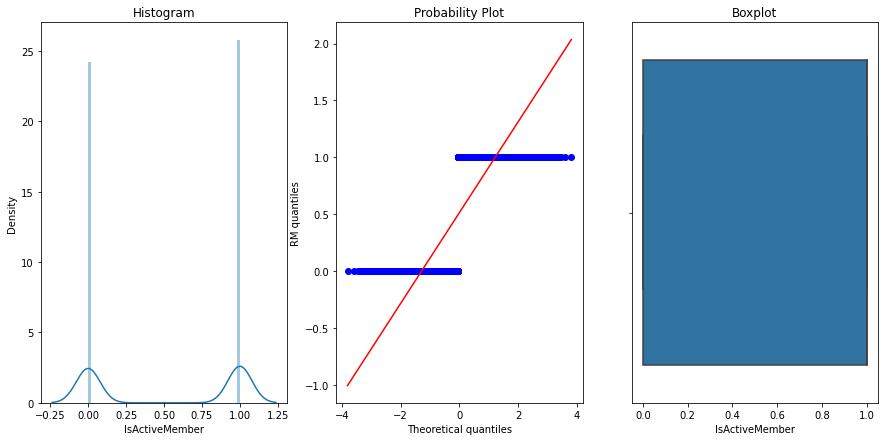

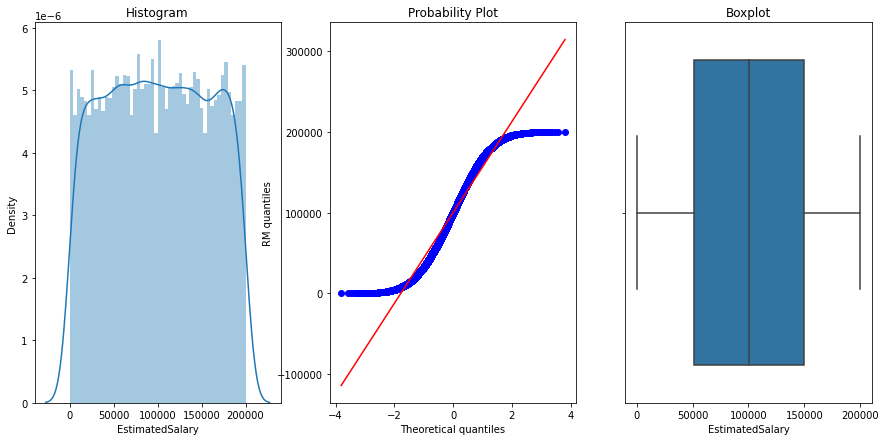

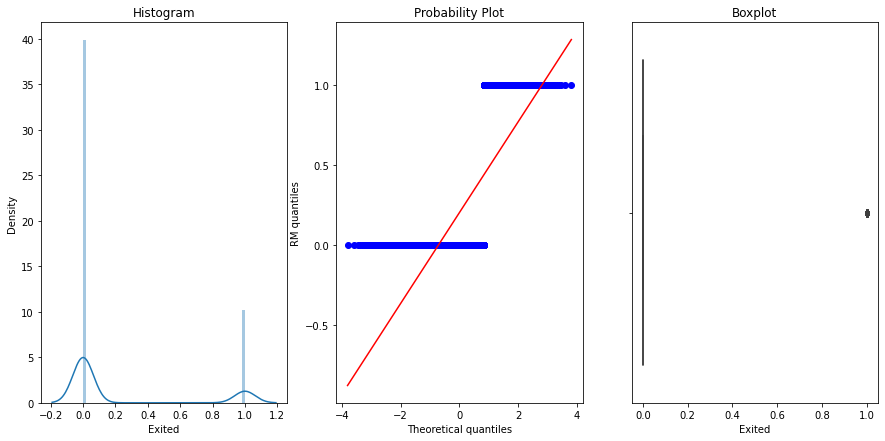

In [6]:
# Plotting numerical feature with probability distribution and checking outlier
for feature in numerical_feature:
    data = df.copy()
    plt.figure(figsize=(15,7))
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[feature], bins=50, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x=data[feature])
    plt.title('Boxplot')
plt.show()

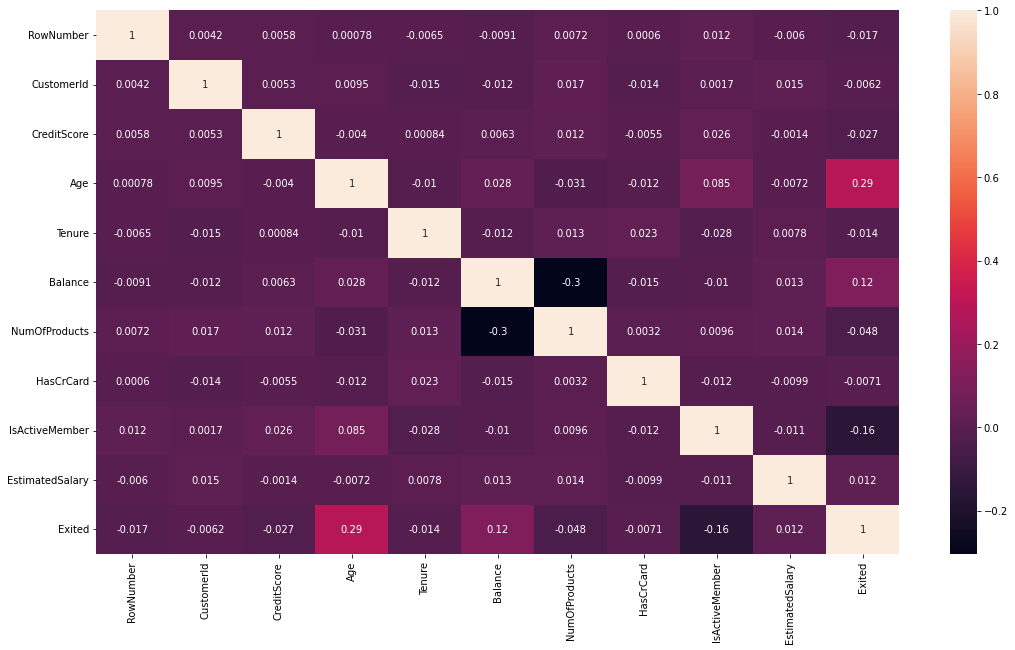

In [7]:
plt.figure(figsize=[18,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

### Data preprocessing:

In [8]:
# checking how many unique value in that columnn for replacing
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [9]:
# replacing categorical value with numerical values
df['Geography'] = df['Geography'].replace(['France', 'Spain', 'Germany'], [0,1,2])
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0, 1])

In [10]:
# drop unwanted columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0


In [13]:
X = df.drop(columns='Exited')
y = df['Exited']

In [14]:
# split dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature scaling:

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Initialising the ANN:

In [16]:
# initialising the model
model = Sequential()

In [17]:
# Adding the input layer (first hidden layer)
model.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu', input_dim = 10))

In [18]:
# Adding the another input layer (second hidden layer)
model.add(Dense(units=20, kernel_initializer='he_uniform', activation='relu')) # for 2nd hidden layer dont use input_dim

In [19]:
# Adding the another input layer (third hidden layer)
# model.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu')) # for 3rd hidden layer dont use input_dim

In [20]:
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [21]:
# compile the ANN 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Fitting the ANN to the Training set
Model = model.fit(X_train, y_train, validation_split=0.3, epochs=100, batch_size=100, )

Epoch 1/100
56/56 [==============================] - 1s 7ms/step - loss: 0.6312 - accuracy: 0.7009 - val_loss: 0.5605 - val_accuracy: 0.7958
Epoch 2/100
56/56 [==============================] - 0s 2ms/step - loss: 0.5404 - accuracy: 0.7961 - val_loss: 0.5237 - val_accuracy: 0.7958
Epoch 3/100
56/56 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.7961 - val_loss: 0.5092 - val_accuracy: 0.7958
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.4992 - accuracy: 0.7961 - val_loss: 0.4933 - val_accuracy: 0.7958
Epoch 5/100
56/56 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7961 - val_loss: 0.4846 - val_accuracy: 0.7958
Epoch 6/100
56/56 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7961 - val_loss: 0.4787 - val_accuracy: 0.7962
Epoch 7/100
56/56 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7984 - val_loss: 0.4732 - val_accuracy: 0.8004
Epoch 8/100
5

In [23]:
# list all data in history
print(Model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


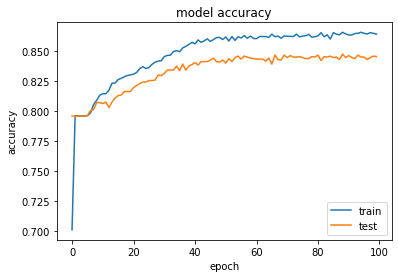

In [24]:
# summarize history for accuracy
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

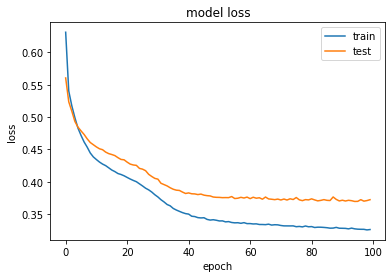

In [25]:
# summarize history for loss
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [26]:
# fitting the test dataset
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

In [27]:
# confusion matrix
print(f"Confusion matrix:\n {confusion_matrix(y_pred, y_test)}")

# classification report
print(f"Classification report:\n {classification_report(y_pred, y_test)}")

Confusion matrix:
 [[1537  215]
 [  58  190]]
Classification report:
               precision    recall  f1-score   support

       False       0.96      0.88      0.92      1752
        True       0.47      0.77      0.58       248

    accuracy                           0.86      2000
   macro avg       0.72      0.82      0.75      2000
weighted avg       0.90      0.86      0.88      2000



### HyperParameter tunning:

In [28]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [29]:
def create_model(layer, activation, kernel):
    model = Sequential()
    for i, nodes in enumerate(layer):
        if i == 0:
            model.add(Dense(nodes, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes), kernel_initializer=kernel)
            model.add(Activation(activation))
            
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer="glorot_uniform"))   # this one is output layer so we use sigmoid af
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
    return model

In [30]:
# creating an object for previous function
model = KerasClassifier(build_fn=create_model)

In [31]:
layers = [[20], [40, 20], [40, 20, 10]]
activations = ['relu', 'sigmoid']
kernel = [['he_uniform', 'he_normal'], ['glorot_uniform', 'glorot_normal']]
para_grid = dict(layer=layers, activation=activations, kernel=kernel, batch_size=[100, 200], nb_epoch=[100])
grid = GridSearchCV(model, para_grid, cv=5)

In [32]:
# fitting dataset with created model 
grid.fit(X_train, y_train, validation_split=0.3)

56/56 [==============================] - 1s 5ms/step - loss: 0.7452 - accuracy: 0.4529 - val_loss: 0.6129 - val_accuracy: 0.7554


GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002D0A15F8880>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'batch_size': [100, 200],
                         'kernel': [['he_uniform', 'he_normal'],
                                    ['glorot_uniform', 'glorot_normal']],
                         'layer': [[20], [40, 20], [40, 20, 10]],
                         'nb_epoch': [100]})

In [33]:
print(grid.best_params_, grid.best_score_)

{'activation': 'relu', 'batch_size': 100, 'kernel': ['he_uniform', 'he_normal'], 'layer': [20], 'nb_epoch': 100} 0.7887499928474426


### HyperParameter Tunnig using KerasTunner:

In [34]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Activation
from keras_tuner import RandomSearch

In [35]:
def create_model(hp):
    model = Sequential()
    for i in range(hp.Int("num_layer", 2, 20)):
        model.add(Dense(units= hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),activation='ELU', kernel_initializer='he_normal'))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [36]:
tunner = RandomSearch(hypermodel=create_model,
                      objective="val_accuracy",
                      max_trials=3,
                      executions_per_trial=2,
                      directory='Log',
                      project_name='HyperTuning')

INFO:tensorflow:Reloading Oracle from existing project Log\HyperTuning\oracle.json
INFO:tensorflow:Reloading Tuner from Log\HyperTuning\tuner0.json


In [37]:
print(tunner.search_space_summary())

Search space summary
Default search space size: 19
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'con

In [38]:
tunner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [39]:
tunner.results_summary()

Results summary
Results in Log\HyperTuning
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layer: 14
units_0: 480
units_1: 416
learning_rate: 0.0001
units_2: 128
units_3: 384
units_4: 384
units_5: 448
units_6: 416
units_7: 320
units_8: 288
units_9: 96
units_10: 480
units_11: 320
units_12: 160
units_13: 512
units_14: 320
units_15: 352
units_16: 64
Score: 0.8618333339691162
Trial summary
Hyperparameters:
num_layer: 7
units_0: 64
units_1: 160
learning_rate: 0.01
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
Score: 0.8613333304723104
Trial summary
Hyperparameters:
num_layer: 15
units_0: 224
units_1: 288
learning_rate: 0.001
units_2: 192
units_3: 64
units_4: 224
units_5: 256
units_6: 352
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: 0.859666665395101
Trial summary
Hyperparameters:
num_layer: 17
units_0: 352
units_1: 288
learning_rate: 0.0001
units_2: 448
unit

In [40]:
from tensorflow import keras
import numpy as np

(x, y), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x[:-10000]
x_val = x[-10000:]
y_train = y[:-10000]
y_val = y[-10000:]

x_train = np.expand_dims(x_train, -1).astype("float32") / 255.0
x_val = np.expand_dims(x_val, -1).astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1).astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [41]:
from tensorflow.keras import layers
from keras_tuner import RandomSearch


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [42]:
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [43]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [44]:
tuner.search(x_train, y_train, epochs=2, validation_data=(x_val, y_val))

Trial 3 Complete [00h 00m 16s]
val_accuracy: 0.9622499942779541

Best val_accuracy So Far: 0.9735499918460846
Total elapsed time: 00h 01m 07s
INFO:tensorflow:Oracle triggered exit


In [45]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units: 320
learning_rate: 0.001
Score: 0.9735499918460846
Trial summary
Hyperparameters:
units: 192
learning_rate: 0.001
Score: 0.9704000055789948
Trial summary
Hyperparameters:
units: 64
learning_rate: 0.001
Score: 0.9622499942779541
